In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [5]:
intrusion_data = pd.read_csv("cybersecurity_intrusion_data.csv")

In [6]:
intrusion_data.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [11]:
missed_values = intrusion_data.isnull().sum()
print(missed_values)

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64


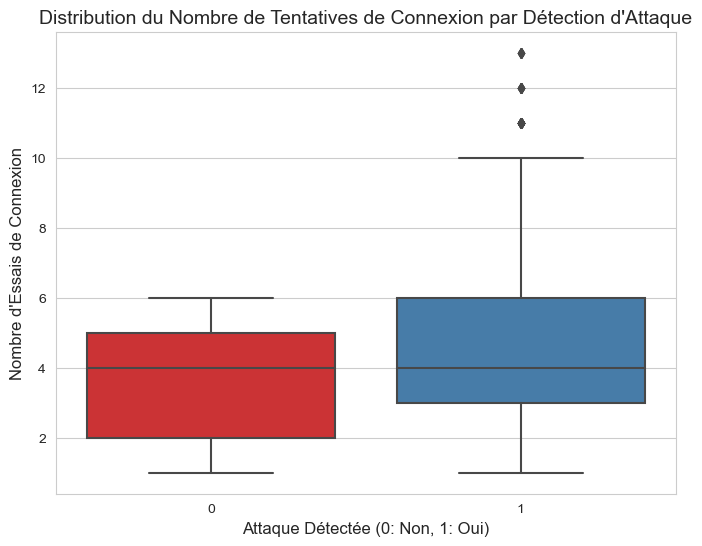

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='attack_detected', 
    y='login_attempts', 
    data=intrusion_data, 
    palette='Set1'
)
# Customize labels and title
plt.title("Distribution du Nombre de Tentatives de Connexion par Détection d'Attaque", fontsize=14)
plt.xlabel("Attaque Détectée (0: Non, 1: Oui)", fontsize=12)
plt.ylabel("Nombre d'Essais de Connexion", fontsize=12)
plt.show()

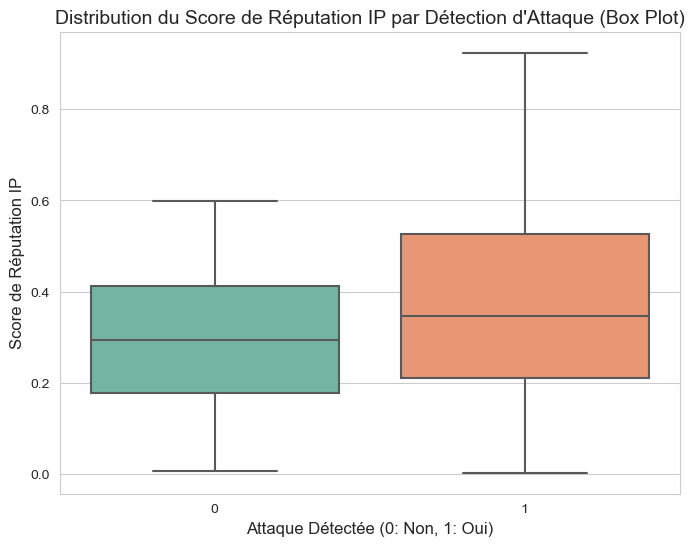

In [19]:
# Set up the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Créer le Diagramme en Boîte à Moustaches (Box Plot)
# C'est une alternative courante au Violin Plot pour comparer les distributions
sns.boxplot(
    x='attack_detected', 
    y='ip_reputation_score', 
    data=intrusion_data, 
    palette='Set2'
)

# Customize labels and title
plt.title("Distribution du Score de Réputation IP par Détection d'Attaque (Box Plot)", fontsize=14)
plt.xlabel("Attaque Détectée (0: Non, 1: Oui)", fontsize=12)
plt.ylabel("Score de Réputation IP", fontsize=12)
plt.show()

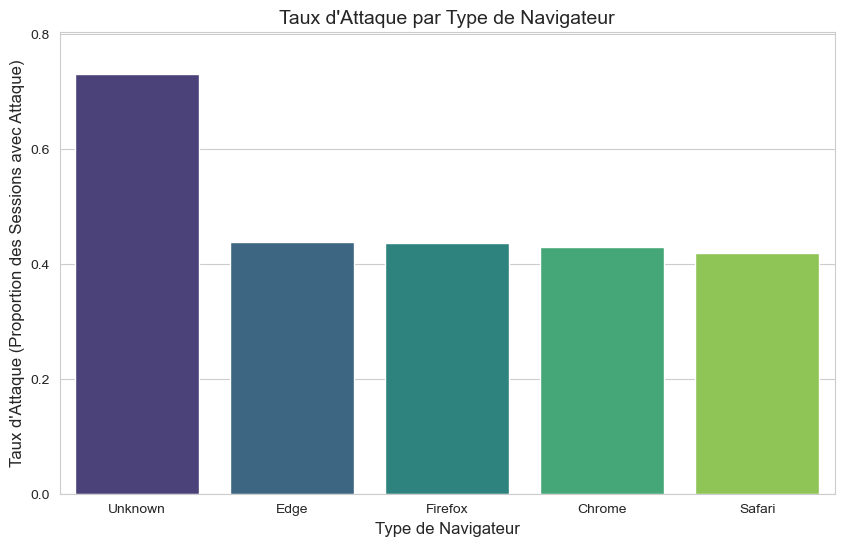

In [18]:
attack_rate_by_browser = intrusion_data.groupby('browser_type')['attack_detected'].mean().reset_index()
attack_rate_by_browser.columns = ['browser_type', 'attack_rate']

# Trier les résultats pour une meilleure visualisation
attack_rate_by_browser = attack_rate_by_browser.sort_values(by='attack_rate', ascending=False)

# 2. Configurer et créer la figure
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# 3. Créer le Diagramme à Barres
sns.barplot(
    x='browser_type', 
    y='attack_rate', 
    data=attack_rate_by_browser, 
    palette='viridis' 
)

# 4. Ajouter les titres et étiquettes
plt.title("Taux d'Attaque par Type de Navigateur", fontsize=14)
plt.xlabel("Type de Navigateur", fontsize=12)
plt.ylabel("Taux d'Attaque (Proportion des Sessions avec Attaque)", fontsize=12)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) # Définir des marques d'axe claires
plt.ylim(0, attack_rate_by_browser['attack_rate'].max() * 1.1) # Ajuster la limite y
plt.show()

In [ ]:
"""target = intrusion_data['attack_detected']
X = intrusion_data.drop('attack_detected',axis=1)
print(target)
print(X)""" 

0       1
1       0
2       1
3       1
4       0
       ..
9532    1
9533    0
9534    0
9535    0
9536    1
Name: attack_detected, Length: 9537, dtype: int64
     session_id  network_packet_size protocol_type  login_attempts  \
0     SID_00001                  599           TCP               4   
1     SID_00002                  472           TCP               3   
2     SID_00003                  629           TCP               3   
3     SID_00004                  804           UDP               4   
4     SID_00005                  453           TCP               5   
...         ...                  ...           ...             ...   
9532  SID_09533                  194          ICMP               3   
9533  SID_09534                  380           TCP               3   
9534  SID_09535                  664           TCP               5   
9535  SID_09536                  406           TCP               4   
9536  SID_09537                  340           TCP               6   


In [9]:
X_train,y_train,X_test,y_test = train_test_split(X,target,test_size=0.2,random_state=42, stratify=target)


In [10]:
svm = SVC()
tree_Classifier = DecisionTreeClassifier(random_state=42)

svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

ValueError: could not convert string to float: 'SID_03335'